## TEST BEST MACHINE LEARRNING ALIGORITHIM FOR  PREDICTION

### We are going to work on Five  machine learning aligorithim to determine the best one to produce  an accurate prediction model.

## 1.LOGISTIC REGRESSION

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.


The logistic regression is probabilistic function that used to determine wethher the pipes  are functiona or not not functional thhat will need repair.

## 2.DECISION TREES

A tree has many analogies in real life, and it turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making.

This methodology is more commonly known as a "learning decision tree" from data, and the above tree is called a Classification tree because the goal is to classify water pump will be either functional or not functional.


## 3.RANDOM FOREST

Random forest is a supervised learning algorithm. The "forest" it builds is an ensemble of decision trees, usually trained with the “bagging” method, a combination of learning models which increases the accuracy of the result.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision. It generates predictions without requiring many configurations.




 ## 4.k Nearest Neighbor Algorithm (kNN)

 The k-Nearest Neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

kNN works by finding the distances between a query and all of the examples in the data, selecting the specified number examples (k) closest to the query, then voting for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

The kNN algorithm assumes the similarity between the new case/data and available cases, and puts the new case into the category that is most similar to the available categories.

## ANALYZING DATA

### 1.Feature importance

### 2.Data Viisualization when biulding a data.

### 3.Splitting the data set.

### 4.Building the model.

### 5.Decision on a training model..

### 6.Training model.

### 7.Evaluation of Model.

### 8.Model fitting

# 1.DECISION TREE

### 1.1IMPORT NECESSARY MODULES

In [1]:
%load_ext autoreload
%autoreload 2
 
%matplotlib inline

In [2]:
#pip install pydot

In [3]:
import numpy as np
import pandas as pd

import xlrd
import os
import seaborn as sns
import time
import warnings
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
#import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

%matplotlib inline
%matplotlib notebook
import seaborn as sebrn

import matplotlib.pyplot as atlas




In [4]:
#create a copy of the combined data
#combined = combined.copy()


In [5]:
# reading csv files and  dropping columns  thhat will  not in use
combined=pd.read_csv('cleaned_data.csv1',index_col=0)
combined= combined.drop(columns  = ['id','amount_tsh',  'num_private', 'date_recorded', 
          'quantity_group', 'recorded_by','payment_type', 
          'waterpoint_type_group',  'subvillage', 'wpt_name',
            'funder', 'installer', 'ward'], axis = 1)
combined.head()

,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,...,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,...,user-group,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe,functional
1,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,False,...,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,...,user-group,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,functional
3,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,...,user-group,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
4,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,...,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional


## Converting Target variable to numerical variables

In [6]:
target_variable = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
combined['status_group'] = combined['status_group'].replace(target_variable)

In [7]:
# look at the values count in status group
combined.status_group.value_counts()

0    32054
2    22659
1     4316
Name: status_group, dtype: int64

0 = functional water points ,

2 = non-functinal water point

1 = functional but needs repair water points

## Converting  boolean of  pubblic meeting and permit to 0 and 1

In [8]:
#convert True/False in public meeting column to 0-1
combined['public_meeting'] = combined['public_meeting'].astype(bool).astype(int)
combined['permit'] = combined['permit'].astype(bool).astype(int)

# Feature Set

In [9]:
# separating target feature from data
X =combined.drop(columns = ['status_group'])
y =combined['status_group']

In [10]:
# using one hot encoder convert categorical data to 
X = pd.get_dummies(X)
X.head()


,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,construction_year,basin_Internal,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,1390,34.938093,-9.856322,11,5,109,1,0,1999,0,...,1,0,0,0,1,0,0,0,0,0
1,1399,34.698766,-2.147466,20,2,280,0,1,2010,0,...,0,1,0,0,1,0,0,0,0,0
2,686,37.460664,-3.821329,21,4,250,1,1,2009,0,...,0,1,0,0,0,1,0,0,0,0
3,263,38.486161,-11.155298,90,63,58,1,1,1986,0,...,1,0,0,0,0,1,0,0,0,0
4,0,31.130847,-1.825359,18,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0


# Normalize the Data

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


## Train-Test Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (41320, 283) (41320,)
Testing set:  (17709, 283) (17709,)


## Training the Model

Starting the algorithm with k=4 neighbors at first

In [13]:
with_k4 = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
with_k4

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Predicting

In [14]:
y_pred = with_k4.predict(X_test)

## Accuracy Evaluation

### Using accuracy classification score to compute subset accuracy.This computes how closely the actual labels and the predicted labels matched in the train set.

In [15]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, with_k4.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.7133107454017426
Test set Accuracy:  0.7036535095149359


## CONFUSION MATRIX

In [16]:
# Create a confusion matrix for K=1 model.
print(classification_report(y_test,y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Pred +', 'Pred Fix', 'Pred -'], index=['Act +', 'Pred Fix', 'Act -']) 

              precision    recall  f1-score   support

           0       0.66      0.95      0.78      9523
           1       0.54      0.06      0.10      1290
           2       0.85      0.49      0.62      6896

    accuracy                           0.70     17709
   macro avg       0.68      0.50      0.50     17709
weighted avg       0.73      0.70      0.67     17709



,Pred +,Pred Fix,Pred -
Act +,9014,43,466
Pred Fix,1066,71,153
Act -,3502,18,3376


## Random Forest Classifier


Training the Model

Data was already split and normalized above. No need to do it again.

In [17]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=None).fit(X_train, y_train)

In [18]:
yhatRF = rfc.predict(X_test)

In [19]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))

Train set Accuracy:  0.995159728944821
Test set Accuracy:  0.7967135354904286


## Let's try a Random Forest with Grid Search cross validation

In [20]:
%%time
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='accuracy').fit(X_train, y_train)

Wall time: 1h 28min 50s


In [21]:
y_predrn=grid_rfc.predict(X_test)

In [22]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, grid_rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_predrn))

Train set Accuracy:  0.8934414327202324
Test set Accuracy:  0.8011745440171664


# Confusion Matrix

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      9523
           1       0.61      0.29      0.39      1290
           2       0.84      0.77      0.80      6896

    accuracy                           0.80     17709
   macro avg       0.75      0.65      0.68     17709
weighted avg       0.80      0.80      0.79     17709



<IPython.core.display.Javascript object>


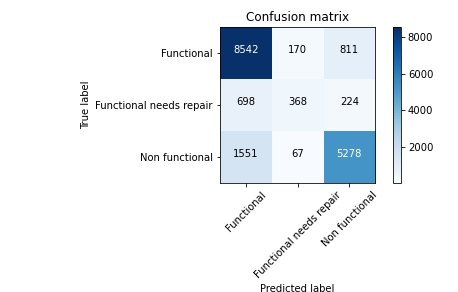

Confusion matrix, without normalization
[[8542  170  811]
 [ 698  368  224]
 [1551   67 5278]]


In [24]:
cnf_matrix = confusion_matrix(y_test,y_predrn)
np.set_printoptions(precision=2)

print (classification_report(y_test,y_predrn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Functional',
                                           'Functional needs repair', 
                                           'Non functional'],
                                            normalize= False,
                                            title='Confusion matrix')

<IPython.core.display.Javascript object>


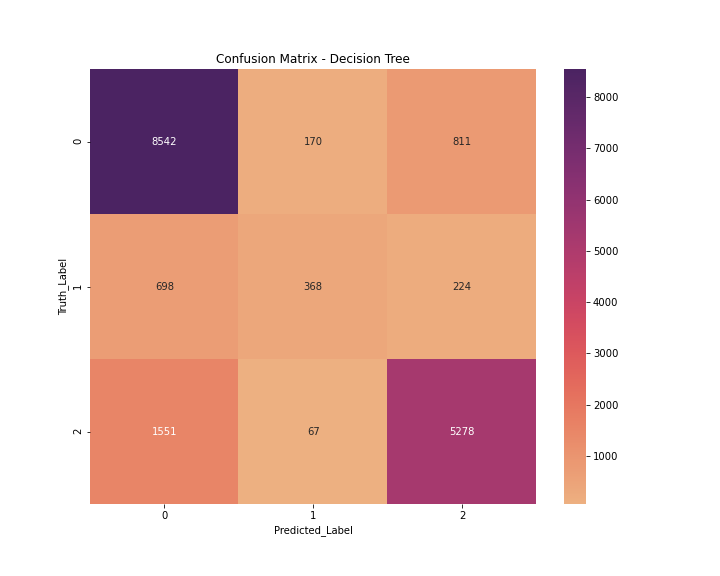

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predrn)
cm
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True),
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Decision Tree')

In [26]:
# to plot and understand confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_predrn),columns= ['Predicted Functional','predicted functional need repair','Predicted nonfunctionla'],index=['Functional','functional need reapir','Non functional'])

,Predicted Functional,predicted functional need repair,Predicted nonfunctionla
Functional,8542,170,811
functional need reapir,698,368,224
Non functional,1551,67,5278
